vcode/20201022154224.jpg
20201022154224.jpg


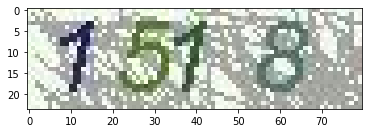

In [2]:
import cv2 # 圖片識別
import requests # 請求
from bs4 import BeautifulSoup # 爬蟲
import shutil # 圖片下載文件處理
import matplotlib.pyplot as plt

headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/86.0.4240.75 Safari/537.36'}
# 進行網站的登入

res = requests.get('https://infinitum.blackwellglobal.com/live3/partner.action', headers = headers)
# 抓取驗證碼圖片資料

soup = BeautifulSoup(res.text, 'html.parser')
# 抓取src的內容

veriImg = soup.select('#veriImg')[0].get('src')

print(veriImg)
# 去除vcode/

Imgname = veriImg.split("vcode/")[1]

print(Imgname)
# url 配置要抓取的圖片連結

url = "https://infinitum.blackwellglobal.com/live3/%s" %veriImg
# 使用stream = True將檔案視為2進位的資料

response = requests.get(url, stream=True)
# 檔案下載

file_name = url.split('/')[-1]

with open(file_name, 'wb') as file:
    shutil.copyfileobj(response.raw, file)
# 圖片讀取

image = cv2.imread(Imgname)
plt.imshow(image)
